In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()


In [54]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

from sklearn.metrics import r2_score
r2_score(ytest, y_lr)

0.711226005748496

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(Xtrain, ytrain.values[:, 0])
ypred = model.predict(Xtest)
r2_score(ytest, ypred)

0.8749965273218174

In [ ]:
# R2 модели линейной регрессии и R2 модели случайного дерева отличаются в пользу второй 
# (0,7112 против 0,845), следовательно, вторая модель лучше

Сумма показателей важности равна 0.9999999999999999
Два наиболее значимых признака:
	 - признак LSTAT со значением 0.4156789214509943
	 - признак RM со значением 0.402704591696731


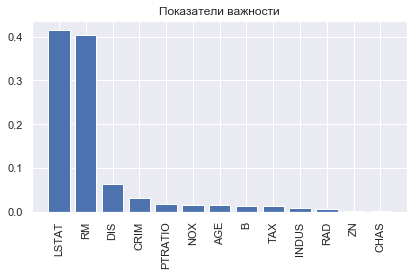

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

importances = model.feature_importances_


 
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
names_indices = boston.feature_names

print(f"Сумма показателей важности равна {importances.sum()}")
idx_max = np.argsort(importances)[-2:][::-1]
print("Два наиболее значимых признака:")
for idx in idx_max:
    print(f'\t - признак {names_indices[idx]} со значением {importances[idx]}')
    
plt.figure()
plt.title("Показатели важности")
 
plt.bar(range(len(importances)), importances[indices], color="b")
plt.xticks(range(len(importances)), names_indices[indices], rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()



